<a href="https://colab.research.google.com/github/zuhaib786/Disconinuity-Identification-in-Numerical-solutions-of-DEs/blob/main/2D2Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import math
class Legendre:
  def __init__(self):
    self.coeff = [[1], [0, 1], [-0.5, 0, 1.5], [0, -1.5, 0, 2.5], [0.375, 0, -3.75,0 , 4.375]]
  def calc(self, x, deg):
    data = self.coeff[deg]
    ans = 0
    mul = 1
    for i in data:
      ans += i * mul
      mul = mul * x
    return ans
class DataGenerator:
  def __init__(self, N_P = 4):
    self.N_P = 4
    self.L = Legendre()
    self.coeff_mat1  = self.genMat()
    self.coeff_mat2 = self.genMat()
    self.order = np.linspace(-1, 1, 101)
    self.mesh_x = np.linspace(-1, 1, 101)
    self.mesh_y = np.linspace(-1, 1, 101)
    self.mesh_x , self.mesh_y = np.meshgrid(self.mesh_x, self.mesh_y)
  def calc(self, mat):
    ans = np.zeros((101, 101))
    data = []
    if mat == 1:
      data = self.coeff_mat1
    else:
      data = self.coeff_mat2 

    for i in range(self.N_P + 1):
      for j in range(self.N_P  +1 - i):
        A = self.L.calc(self.mesh_x, i)
        B = self.L.calc(self.mesh_y, j)
        ans += data[i][j] *(A*B)
    return ans
  def lineCut(self):
    theta = np.random.uniform(0, 2*math.pi)
    x_0, y_0 = np.random.choice(self.order , 1), np.random.choice(self.order, 1)
    x_0 = list(x_0)[0]
    y_0 = list(y_0)[0]
    return self.lineToBinaryMat(x_0, y_0, theta) 
  def LineCalc(self, x_0, y_0, theta, x, y):
    return np.cos(theta) * (x - x_0) + np.sin(theta) * (y - y_0)
  def circCut(self):
    r = np.random.uniform(0.5, 3)
    x_0, y_0 = np.random.choice(self.order , 1), np.random.choice(self.order, 1)
    x_0 = list(x_0)[0]
    y_0 = list(y_0)[0]
    x_0, y_0 = 0,0
    return self.cricToBinaryMat(x_0, y_0, r)
  def lineToBinaryMat(self, x_0, y_0, theta):
    A = self.LineCalc(x_0, y_0, theta, self.mesh_x, self.mesh_y)
    labels = np.zeros((100, 100))
    coarse_labels = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            dp =[0, 10]
            temp = []
            for dx in dp:
                for dy in dp:
                    temp.append((10 * i + dx , 10 * j + dy))
            ct1 , ct2 = 0, 0
            for (x, y) in temp:
                val = self.LineCalc(x_0, y_0, theta, self.mesh_x[x, y], self.mesh_y[x, y])
                if val <=0:
                    ct1 += 1
                else:
                    ct2 += 1
            if ct1 != 0 and ct2 != 0:
                coarse_labels[i, j] = 1


    for i in range(100):
        for j in range(100):
            val1 = self.LineCalc(x_0, y_0, theta, self.mesh_x[i, j], self.mesh_y[i, j])
            val2 = self.LineCalc(x_0, y_0, theta, self.mesh_x[i + 1, j], self.mesh_y[i + 1, j])
            val3 = self.LineCalc(x_0, y_0, theta, self.mesh_x[i, j + 1], self.mesh_y[i, j + 1])
            val4 = self.LineCalc(x_0, y_0, theta, self.mesh_x[i + 1, j + 1], self.mesh_y[i + 1, j + 1])
            ct1, ct2  = 0, 0
            for val in [val1, val2, val3, val4]:
                if val <= 0:
                    ct1 += 1
                else:
                    ct2 += 1
            if ct1 != 0 and ct2 != 0:
                labels[i, j] = 1
    return A>=0 , labels, coarse_labels

  def CircCalc(self, x_0, y_0, r, x, y):
    return (x - x_0) * (x- x_0) + (y - y_0) * (y - y_0) - r
  def cricToBinaryMat(self, x_0, y_0, r):
    A = self.CircCalc(x_0, y_0, r, self.mesh_x, self.mesh_y)
    labels = np.zeros((100, 100))
    coarse_labels = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            dp =[0, 10]
            temp = []
            for dx in dp:
                for dy in dp:
                    temp.append((10 * i + dx , 10 * j + dy))
            ct1 , ct2 = 0, 0
            for (x, y) in temp:
                val = self.CircCalc(x_0, y_0, r, self.mesh_x[x, y], self.mesh_y[x, y])
                if val <=0:
                    ct1 += 1
                else:
                    ct2 += 1
            if ct1 != 0 and ct2 != 0:
                coarse_labels[i, j] = 1
    for i  in range(100):
        for j in range(100):
            val1 = self.CircCalc(x_0, y_0,  r, self.mesh_x[i, j], self.mesh_y[i, j])
            val2 = self.CircCalc(x_0, y_0, r,self.mesh_x[i  + 1, j], self.mesh_y[i + 1, j])
            val3  = self.CircCalc(x_0, y_0, r, self.mesh_x[i, j+ 1], self.mesh_y[i, j + 1])
            val4 = self.CircCalc(x_0, y_0, r, self.mesh_x[i + 1, j + 1], self.mesh_y[i + 1, j + 1])
            ct1, ct2  = 0, 0
            for val in [val1, val2, val3, val4]:
                if val <= 0:
                    ct1 += 1
                else:
                    ct2 += 1
            if ct1 != 0 and ct2 != 0:
                labels[i, j] = 1
    return A>=0 , labels, coarse_labels
  def genMat(self):
    data = np.random.normal(0, 1, size=(101, 101))
    return data
  def DataPointLine(self):
    self.mat1 = self.genMat()
    self.mat2 = self.genMat()
    ans1  = self.calc(1)
    ans2 = self.calc(2)
    y, label, coarse_labels = self.lineCut()
    ans = ans1 * y + ans2 *( 1- y)
    return ans, label, coarse_labels
  def DataPointCirc(self):
    self.mat1 = self.genMat()
    self.mat2 = self.genMat()
    ans1 = self.calc(1)
    ans2 = self.calc(2)
    y, label, coarse_labels = self.circCut()
    ans = ans1 * y + ans2 * ( 1- y)
    return ans, label, coarse_labels




In [11]:
d = DataGenerator()
ans, lable, coarse_label = d.DataPointCirc()
ans.shape, lable.shape, coarse_label.shape

((101, 101), (100, 100), (10, 10))

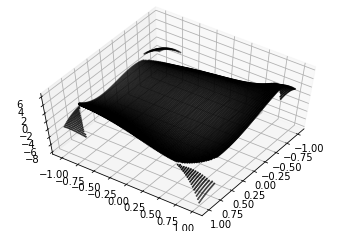

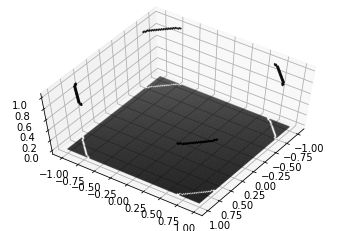

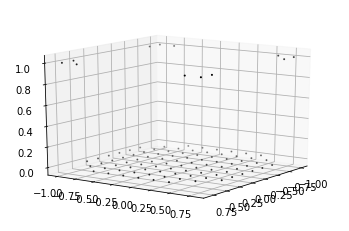

In [13]:
x = np.linspace(-1, 1, 11)
y = np.linspace(-1, 1, 11)
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x, d.mesh_y, ans,color = 'black', s =1)
ax.view_init(60, 35)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(d.mesh_x[:100, :100], d.mesh_y[:100, :100], lable,color = 'black', s = 1)
ax.view_init(60, 35)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x[:10, :10], y[:10, :10], coarse_label,color = 'black', s = 1)
ax.view_init(15, 35)



In [23]:
from tqdm.notebook import tqdm
import random
def getData(M):
  d = DataGenerator()
  x = []
  y = []
  for i in tqdm(range(M)):
    a = random.randint(1, 5)
    if a%2 == 0:
      ans, label, coarse_labels = d.DataPointLine()
    else:
      ans, label, coarse_labels = d.DataPointCirc()
    # c_ans = np.zeros((11, 11))
    # for i in range(11):
    #   for j in range(11):
    #     c_ans[i, j] = ans[10*i , 10*j]
    # m ,n = c_ans.shape
    # c_ans = c_ans.reshape((m, n, 1))

    coarse_labels = coarse_labels.reshape(100)
    m,n = ans.shape
    ans = ans.reshape((m, n, 1))
    x.append(ans)
    y.append(coarse_labels)
  return np.asarray(x), np.asarray(y)

In [18]:
x, y = getData(2)

  0%|          | 0/2 [00:00<?, ?it/s]

In [19]:
x.shape, y.shape

((2, 11, 11, 1), (2, 100))

In [56]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import MaxPooling2D,Lambda,Dense,BatchNormalization,Flatten,Reshape,Dropout,Activation,Convolution2D,GlobalAveragePooling1D
from keras.optimizers import SGD, Adam
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from keras.models import Model
import matplotlib.patches as patches
from keras.callbacks import ModelCheckpoint
###############################################################################
def root_mean_squared_error(y_pred,y_true):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
def createCoarseModel():
  model = Sequential()
  model.add(Convolution2D(32, (4,4),strides=(1,1),input_shape=(101,101,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(32, (2,2),strides=(1,1),activation='relu'))
  model.add(Convolution2D(32, (2,2),strides=(1,1),activation='relu'))
  model.add(Convolution2D(32, (2,2),strides=(1,1),activation='relu'))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(100, activation = 'sigmoid'))

  adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(optimizer = "adam", loss =tf.keras.losses.BinaryCrossentropy() ,
                metrics=[tf.keras.metrics.BinaryAccuracy(),
                        tf.keras.metrics.FalseNegatives()])
  return model

In [34]:
model = createCoarseModel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        4128      
                                                                 
 conv2d_14 (Conv2D)          (None, 47, 47, 32)        4128      
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        4128      
                                                                 
 dropout_3 (Dropout)         (None, 46, 46, 32)        0         
                                                      

In [36]:
for _ in tqdm(range(10)):
  x,y = getData(100)
  model.fit(x = x,
            y = y,
            validation_split =0.1, 
            epochs = 5
            )

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 498ms/step - loss: 0.4192 - binary_accuracy: 0.8766 - false_negatives_1: 1111.0000 - val_loss: 0.4456 - val_binary_accuracy: 0.8360 - val_false_negatives_1: 164.0000
Epoch 2/5
3/3 [==============================] - 1s 468ms/step - loss: 0.3766 - binary_accuracy: 0.8766 - false_negatives_1: 1111.0000 - val_loss: 0.4429 - val_binary_accuracy: 0.8360 - val_false_negatives_1: 164.0000
Epoch 3/5
3/3 [==============================] - 1s 459ms/step - loss: 0.3476 - binary_accuracy: 0.8766 - false_negatives_1: 1111.0000 - val_loss: 0.4315 - val_binary_accuracy: 0.8360 - val_false_negatives_1: 164.0000
Epoch 4/5
3/3 [==============================] - 1s 460ms/step - loss: 0.3259 - binary_accuracy: 0.8766 - false_negatives_1: 1111.0000 - val_loss: 0.3877 - val_binary_accuracy: 0.8440 - val_false_negatives_1: 156.0000
Epoch 5/5
3/3 [==============================] - 1s 463ms/step - loss: 0.3049 - binary_accuracy: 0.8839 - false_negatives_1: 104

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 480ms/step - loss: 0.3639 - binary_accuracy: 0.8809 - false_negatives_1: 943.0000 - val_loss: 0.3471 - val_binary_accuracy: 0.8800 - val_false_negatives_1: 120.0000
Epoch 2/5
3/3 [==============================] - 1s 457ms/step - loss: 0.2867 - binary_accuracy: 0.8936 - false_negatives_1: 958.0000 - val_loss: 0.3094 - val_binary_accuracy: 0.8870 - val_false_negatives_1: 110.0000
Epoch 3/5
3/3 [==============================] - 1s 466ms/step - loss: 0.2385 - binary_accuracy: 0.9296 - false_negatives_1: 609.0000 - val_loss: 0.2758 - val_binary_accuracy: 0.9110 - val_false_negatives_1: 81.0000
Epoch 4/5
3/3 [==============================] - 1s 461ms/step - loss: 0.1900 - binary_accuracy: 0.9357 - false_negatives_1: 529.0000 - val_loss: 0.2822 - val_binary_accuracy: 0.9120 - val_false_negatives_1: 76.0000
Epoch 5/5
3/3 [==============================] - 1s 461ms/step - loss: 0.1538 - binary_accuracy: 0.9454 - false_negatives_1: 455.0000 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 474ms/step - loss: 0.2342 - binary_accuracy: 0.9416 - false_negatives_1: 495.0000 - val_loss: 0.2316 - val_binary_accuracy: 0.9280 - val_false_negatives_1: 39.0000
Epoch 2/5
3/3 [==============================] - 1s 462ms/step - loss: 0.1370 - binary_accuracy: 0.9601 - false_negatives_1: 256.0000 - val_loss: 0.2155 - val_binary_accuracy: 0.9350 - val_false_negatives_1: 35.0000
Epoch 3/5
3/3 [==============================] - 1s 460ms/step - loss: 0.0934 - binary_accuracy: 0.9671 - false_negatives_1: 203.0000 - val_loss: 0.2124 - val_binary_accuracy: 0.9370 - val_false_negatives_1: 41.0000
Epoch 4/5
3/3 [==============================] - 1s 466ms/step - loss: 0.0587 - binary_accuracy: 0.9803 - false_negatives_1: 161.0000 - val_loss: 0.2335 - val_binary_accuracy: 0.9350 - val_false_negatives_1: 35.0000
Epoch 5/5
3/3 [==============================] - 1s 465ms/step - loss: 0.0376 - binary_accuracy: 0.9901 - false_negatives_1: 70.0000 - v

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 491ms/step - loss: 0.2588 - binary_accuracy: 0.9251 - false_negatives_1: 402.0000 - val_loss: 0.2964 - val_binary_accuracy: 0.9290 - val_false_negatives_1: 69.0000
Epoch 2/5
3/3 [==============================] - 1s 456ms/step - loss: 0.1767 - binary_accuracy: 0.9466 - false_negatives_1: 456.0000 - val_loss: 0.2378 - val_binary_accuracy: 0.9350 - val_false_negatives_1: 59.0000
Epoch 3/5
3/3 [==============================] - 1s 458ms/step - loss: 0.1195 - binary_accuracy: 0.9629 - false_negatives_1: 242.0000 - val_loss: 0.2152 - val_binary_accuracy: 0.9290 - val_false_negatives_1: 51.0000
Epoch 4/5
3/3 [==============================] - 1s 463ms/step - loss: 0.0768 - binary_accuracy: 0.9793 - false_negatives_1: 149.0000 - val_loss: 0.2110 - val_binary_accuracy: 0.9400 - val_false_negatives_1: 52.0000
Epoch 5/5
3/3 [==============================] - 1s 462ms/step - loss: 0.0522 - binary_accuracy: 0.9849 - false_negatives_1: 122.0000 - 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 483ms/step - loss: 0.3534 - binary_accuracy: 0.9217 - false_negatives_1: 432.0000 - val_loss: 0.2488 - val_binary_accuracy: 0.9350 - val_false_negatives_1: 38.0000
Epoch 2/5
3/3 [==============================] - 2s 616ms/step - loss: 0.1706 - binary_accuracy: 0.9439 - false_negatives_1: 355.0000 - val_loss: 0.2321 - val_binary_accuracy: 0.9390 - val_false_negatives_1: 50.0000
Epoch 3/5
3/3 [==============================] - 1s 473ms/step - loss: 0.1352 - binary_accuracy: 0.9530 - false_negatives_1: 314.0000 - val_loss: 0.2127 - val_binary_accuracy: 0.9420 - val_false_negatives_1: 45.0000
Epoch 4/5
3/3 [==============================] - 1s 461ms/step - loss: 0.1082 - binary_accuracy: 0.9683 - false_negatives_1: 193.0000 - val_loss: 0.2089 - val_binary_accuracy: 0.9410 - val_false_negatives_1: 46.0000
Epoch 5/5
3/3 [==============================] - 1s 468ms/step - loss: 0.0842 - binary_accuracy: 0.9740 - false_negatives_1: 193.0000 - 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 490ms/step - loss: 0.2432 - binary_accuracy: 0.9329 - false_negatives_1: 470.0000 - val_loss: 0.1257 - val_binary_accuracy: 0.9620 - val_false_negatives_1: 21.0000
Epoch 2/5
3/3 [==============================] - 1s 476ms/step - loss: 0.1715 - binary_accuracy: 0.9450 - false_negatives_1: 264.0000 - val_loss: 0.1314 - val_binary_accuracy: 0.9630 - val_false_negatives_1: 19.0000
Epoch 3/5
3/3 [==============================] - 1s 460ms/step - loss: 0.1279 - binary_accuracy: 0.9609 - false_negatives_1: 227.0000 - val_loss: 0.1179 - val_binary_accuracy: 0.9740 - val_false_negatives_1: 20.0000
Epoch 4/5
3/3 [==============================] - 2s 773ms/step - loss: 0.0964 - binary_accuracy: 0.9688 - false_negatives_1: 257.0000 - val_loss: 0.1147 - val_binary_accuracy: 0.9740 - val_false_negatives_1: 21.0000
Epoch 5/5
3/3 [==============================] - 2s 612ms/step - loss: 0.0693 - binary_accuracy: 0.9763 - false_negatives_1: 202.0000 - 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 476ms/step - loss: 0.2249 - binary_accuracy: 0.9337 - false_negatives_1: 450.0000 - val_loss: 0.1793 - val_binary_accuracy: 0.9440 - val_false_negatives_1: 56.0000
Epoch 2/5
3/3 [==============================] - 1s 476ms/step - loss: 0.1560 - binary_accuracy: 0.9514 - false_negatives_1: 388.0000 - val_loss: 0.1574 - val_binary_accuracy: 0.9390 - val_false_negatives_1: 49.0000
Epoch 3/5
3/3 [==============================] - 1s 468ms/step - loss: 0.1355 - binary_accuracy: 0.9569 - false_negatives_1: 337.0000 - val_loss: 0.1581 - val_binary_accuracy: 0.9370 - val_false_negatives_1: 53.0000
Epoch 4/5
3/3 [==============================] - 1s 476ms/step - loss: 0.1111 - binary_accuracy: 0.9626 - false_negatives_1: 306.0000 - val_loss: 0.1593 - val_binary_accuracy: 0.9390 - val_false_negatives_1: 47.0000
Epoch 5/5
3/3 [==============================] - 1s 469ms/step - loss: 0.0860 - binary_accuracy: 0.9688 - false_negatives_1: 249.0000 - 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 501ms/step - loss: 0.2506 - binary_accuracy: 0.9199 - false_negatives_1: 687.0000 - val_loss: 0.2513 - val_binary_accuracy: 0.9100 - val_false_negatives_1: 69.0000
Epoch 2/5
3/3 [==============================] - 1s 466ms/step - loss: 0.1727 - binary_accuracy: 0.9502 - false_negatives_1: 296.0000 - val_loss: 0.2683 - val_binary_accuracy: 0.9250 - val_false_negatives_1: 57.0000
Epoch 3/5
3/3 [==============================] - 1s 467ms/step - loss: 0.1509 - binary_accuracy: 0.9526 - false_negatives_1: 259.0000 - val_loss: 0.2658 - val_binary_accuracy: 0.9270 - val_false_negatives_1: 65.0000
Epoch 4/5
3/3 [==============================] - 1s 468ms/step - loss: 0.1214 - binary_accuracy: 0.9604 - false_negatives_1: 314.0000 - val_loss: 0.2737 - val_binary_accuracy: 0.9260 - val_false_negatives_1: 68.0000
Epoch 5/5
3/3 [==============================] - 1s 463ms/step - loss: 0.0995 - binary_accuracy: 0.9630 - false_negatives_1: 306.0000 - 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 487ms/step - loss: 0.2284 - binary_accuracy: 0.9447 - false_negatives_1: 323.0000 - val_loss: 0.2012 - val_binary_accuracy: 0.9520 - val_false_negatives_1: 35.0000
Epoch 2/5
3/3 [==============================] - 1s 460ms/step - loss: 0.1459 - binary_accuracy: 0.9604 - false_negatives_1: 273.0000 - val_loss: 0.1772 - val_binary_accuracy: 0.9520 - val_false_negatives_1: 33.0000
Epoch 3/5
3/3 [==============================] - 1s 469ms/step - loss: 0.1005 - binary_accuracy: 0.9678 - false_negatives_1: 204.0000 - val_loss: 0.1703 - val_binary_accuracy: 0.9580 - val_false_negatives_1: 32.0000
Epoch 4/5
3/3 [==============================] - 1s 464ms/step - loss: 0.0779 - binary_accuracy: 0.9762 - false_negatives_1: 182.0000 - val_loss: 0.1695 - val_binary_accuracy: 0.9570 - val_false_negatives_1: 35.0000
Epoch 5/5
3/3 [==============================] - 1s 479ms/step - loss: 0.0585 - binary_accuracy: 0.9818 - false_negatives_1: 142.0000 - 

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/5
3/3 [==============================] - 1s 490ms/step - loss: 0.3099 - binary_accuracy: 0.9223 - false_negatives_1: 316.0000 - val_loss: 0.0503 - val_binary_accuracy: 0.9830 - val_false_negatives_1: 17.0000
Epoch 2/5
3/3 [==============================] - 1s 490ms/step - loss: 0.1692 - binary_accuracy: 0.9499 - false_negatives_1: 367.0000 - val_loss: 0.0479 - val_binary_accuracy: 0.9880 - val_false_negatives_1: 12.0000
Epoch 3/5
3/3 [==============================] - 1s 462ms/step - loss: 0.1254 - binary_accuracy: 0.9592 - false_negatives_1: 296.0000 - val_loss: 0.0548 - val_binary_accuracy: 0.9890 - val_false_negatives_1: 10.0000
Epoch 4/5
3/3 [==============================] - 1s 464ms/step - loss: 0.1081 - binary_accuracy: 0.9664 - false_negatives_1: 212.0000 - val_loss: 0.0561 - val_binary_accuracy: 0.9860 - val_false_negatives_1: 8.0000
Epoch 5/5
3/3 [==============================] - 1s 459ms/step - loss: 0.0869 - binary_accuracy: 0.9740 - false_negatives_1: 176.0000 - v

In [47]:
x,y = getData(10)
pred = model.predict(x)
# y[:10], (pred[:10]>0.5).astype('float32')
y.shape

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 59ms/step


(10, 100)

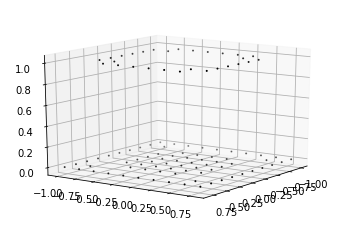

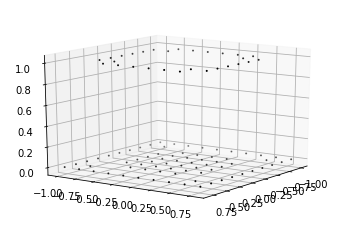

In [48]:
xx = np.linspace(-1, 1, 11)
yy  = np.linspace(-1, 1, 11)
xx,yy = np.meshgrid(xx, yy)
pred = (pred >0.5).astype('float32')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:10, :10], yy[:10, :10], y[2].reshape((10, 10)),color = 'black', s = 1)
ax.view_init(15, 35)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:10, :10], yy[:10, :10], pred[2].reshape((10, 10)),color = 'black', s = 1)
ax.view_init(15, 35)

In [49]:
model.save('content')

In [51]:
!cp CoarseModel -r drive/MyDrive

In [52]:
fmodel = keras.models.load_model("CoarseModel")
fmodel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        544       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 48, 48, 32)        4128      
                                                                 
 conv2d_14 (Conv2D)          (None, 47, 47, 32)        4128      
                                                                 
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        4128      
                                                                 
 dropout_3 (Dropout)         (None, 46, 46, 32)        0         
                                                      

In [53]:
tpred = fmodel.predict(x)
tpred = (tpred>0.5).astype('float32')
np.linalg.norm(tpred - pred)

1/1 [==============================] - 0s 310ms/step


0.0

In [84]:
def createFineModel():
  model = Sequential()
  model.add(Convolution2D(32, (2,2),strides=(1,1),input_shape=(11,11,1),activation='relu'))
  model.add(Convolution2D(32, (2,2),strides=(1,1),activation='relu'))
  model.add(Convolution2D(32, (2,2),strides=(1,1),activation='relu'))
  model.add(Flatten())
  model.add(Dropout(0.1))
  model.add(Dense(100,activation = 'sigmoid'))

  adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(optimizer = "adam", loss =tf.keras.losses.BinaryCrossentropy(), 
                metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives()])
  return model

In [75]:
def getFineData(M):
  x = []
  y = []
  d = DataGenerator()
  for i in tqdm(range(M)):
    if i%2 == 0:
      ans, labels, coarselabels = d.DataPointLine()
    else:
      ans, labels , coarselabels = d.DataPointCirc()
    for i in range(10):
      for j in range(10):
        temp_x = ans[10*i: 10*(i + 1) + 1, 10*j : 10*(j + 1)  + 1]
        temp_y = labels[10*i : 10 * (i + 1) , 10 * j : 10 *(j + 1)]
        temp_x = temp_x.reshape((11, 11, 1))
        temp_y = temp_y.reshape(100)
        x.append(temp_x)
        y.append(temp_y)
  r = np.array(range(len(x)))
  r = np.random.shuffle(r)
  x = np.array(x)
  y = np.array(y)
  x = x[r]
  y = y[r]
  x = x.squeeze(axis = 0)
  y = y.squeeze(axis = 0)
  return x, y


In [76]:
x,y = getFineData(2)


  0%|          | 0/2 [00:00<?, ?it/s]

In [77]:
x.shape, y.shape

((200, 11, 11, 1), (200, 100))

In [71]:
for i in range(200):
  if np.sum(y[i])!=0:
    print(i)
    break

1


In [66]:
x.shape, y.shape

((1, 200, 11, 11), (1, 200, 10, 10))

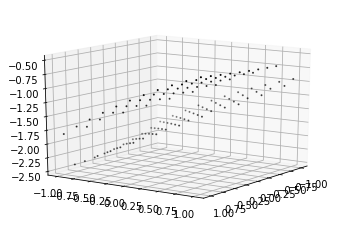

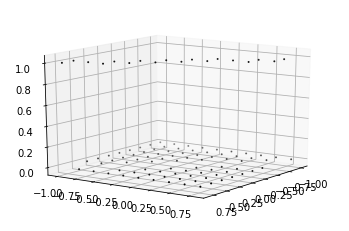

In [72]:
xx = np.linspace(-1, 1, 11)
yy  = np.linspace(-1, 1, 11)
xx,yy = np.meshgrid(xx, yy)
pred = (pred >0.5).astype('float32')
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, x[1].reshape((11, 11)),color = 'black', s = 1)
ax.view_init(15, 35)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:10, :10], yy[:10, :10], y[1].reshape((10, 10)),color = 'black', s = 1)
ax.view_init(15, 35)

In [85]:
model = createFineModel()
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 10, 10, 32)        160       
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 32)          4128      
                                                                 
 conv2d_27 (Conv2D)          (None, 8, 8, 32)          4128      
                                                                 
 flatten_7 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_7 (Dropout)         (None, 2048)              0         
                                                                 
 dense_7 (Dense)             (None, 100)               204900    
                                                                 
Total params: 213,316
Trainable params: 213,316
Non-tr

In [86]:
for i in tqdm(range(100)):
  x,y = getFineData(30)
  model.fit(
      x = x,
      y = y,
      validation_split = 0.1,
      epochs = 5
  )

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 2s 18ms/step - loss: 0.1327 - binary_accuracy: 0.9776 - false_negatives_2: 3442.0000 - val_loss: 0.0713 - val_binary_accuracy: 0.9878 - val_false_negatives_2: 367.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0716 - binary_accuracy: 0.9870 - false_negatives_2: 3509.0000 - val_loss: 0.0655 - val_binary_accuracy: 0.9878 - val_false_negatives_2: 367.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0687 - binary_accuracy: 0.9870 - false_negatives_2: 3509.0000 - val_loss: 0.0678 - val_binary_accuracy: 0.9878 - val_false_negatives_2: 367.0000
Epoch 4/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0666 - binary_accuracy: 0.9870 - false_negatives_2: 3509.0000 - val_loss: 0.0637 - val_binary_accuracy: 0.9878 - val_false_negatives_2: 367.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0593 - binary_accuracy: 0.9871 - false_negatives_2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0534 - binary_accuracy: 0.9869 - false_negatives_2: 3216.0000 - val_loss: 0.0599 - val_binary_accuracy: 0.9839 - val_false_negatives_2: 410.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0441 - binary_accuracy: 0.9880 - false_negatives_2: 2883.0000 - val_loss: 0.0586 - val_binary_accuracy: 0.9839 - val_false_negatives_2: 404.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0382 - binary_accuracy: 0.9891 - false_negatives_2: 2547.0000 - val_loss: 0.0554 - val_binary_accuracy: 0.9835 - val_false_negatives_2: 371.0000
Epoch 4/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0337 - binary_accuracy: 0.9902 - false_negatives_2: 2249.0000 - val_loss: 0.0523 - val_binary_accuracy: 0.9843 - val_false_negatives_2: 355.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0300 - binary_accuracy: 0.9909 - false_negatives_2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0403 - binary_accuracy: 0.9910 - false_negatives_2: 2098.0000 - val_loss: 0.0552 - val_binary_accuracy: 0.9866 - val_false_negatives_2: 367.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0337 - binary_accuracy: 0.9917 - false_negatives_2: 2001.0000 - val_loss: 0.0556 - val_binary_accuracy: 0.9867 - val_false_negatives_2: 357.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0312 - binary_accuracy: 0.9922 - false_negatives_2: 1865.0000 - val_loss: 0.0485 - val_binary_accuracy: 0.9875 - val_false_negatives_2: 317.0000
Epoch 4/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0294 - binary_accuracy: 0.9929 - false_negatives_2: 1722.0000 - val_loss: 0.0494 - val_binary_accuracy: 0.9877 - val_false_negatives_2: 329.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0268 - binary_accuracy: 0.9932 - false_negatives_2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0268 - binary_accuracy: 0.9924 - false_negatives_2: 1507.0000 - val_loss: 0.0389 - val_binary_accuracy: 0.9865 - val_false_negatives_2: 271.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0193 - binary_accuracy: 0.9941 - false_negatives_2: 1214.0000 - val_loss: 0.0349 - val_binary_accuracy: 0.9883 - val_false_negatives_2: 225.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0164 - binary_accuracy: 0.9951 - false_negatives_2: 999.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9888 - val_false_negatives_2: 210.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0147 - binary_accuracy: 0.9957 - false_negatives_2: 874.0000 - val_loss: 0.0321 - val_binary_accuracy: 0.9895 - val_false_negatives_2: 228.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0138 - binary_accuracy: 0.9961 - false_negatives_2: 

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 2s 20ms/step - loss: 0.0141 - binary_accuracy: 0.9952 - false_negatives_2: 855.0000 - val_loss: 0.0224 - val_binary_accuracy: 0.9920 - val_false_negatives_2: 159.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0098 - binary_accuracy: 0.9967 - false_negatives_2: 618.0000 - val_loss: 0.0220 - val_binary_accuracy: 0.9924 - val_false_negatives_2: 164.0000
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0081 - binary_accuracy: 0.9973 - false_negatives_2: 517.0000 - val_loss: 0.0214 - val_binary_accuracy: 0.9931 - val_false_negatives_2: 129.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0068 - binary_accuracy: 0.9978 - false_negatives_2: 436.0000 - val_loss: 0.0216 - val_binary_accuracy: 0.9932 - val_false_negatives_2: 136.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0056 - binary_accuracy: 0.9983 - false_negatives_2: 33

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0184 - binary_accuracy: 0.9949 - false_negatives_2: 1039.0000 - val_loss: 0.0181 - val_binary_accuracy: 0.9949 - val_false_negatives_2: 122.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0128 - binary_accuracy: 0.9964 - false_negatives_2: 749.0000 - val_loss: 0.0168 - val_binary_accuracy: 0.9949 - val_false_negatives_2: 129.0000
Epoch 3/5
85/85 [==============================] - 2s 25ms/step - loss: 0.0104 - binary_accuracy: 0.9971 - false_negatives_2: 633.0000 - val_loss: 0.0180 - val_binary_accuracy: 0.9950 - val_false_negatives_2: 115.0000
Epoch 4/5
85/85 [==============================] - 3s 31ms/step - loss: 0.0097 - binary_accuracy: 0.9974 - false_negatives_2: 560.0000 - val_loss: 0.0147 - val_binary_accuracy: 0.9953 - val_false_negatives_2: 104.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0085 - binary_accuracy: 0.9977 - false_negatives_2: 4

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0124 - binary_accuracy: 0.9964 - false_negatives_2: 671.0000 - val_loss: 0.0093 - val_binary_accuracy: 0.9978 - val_false_negatives_2: 56.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0087 - binary_accuracy: 0.9975 - false_negatives_2: 504.0000 - val_loss: 0.0068 - val_binary_accuracy: 0.9979 - val_false_negatives_2: 53.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0077 - binary_accuracy: 0.9979 - false_negatives_2: 446.0000 - val_loss: 0.0064 - val_binary_accuracy: 0.9981 - val_false_negatives_2: 46.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0062 - binary_accuracy: 0.9983 - false_negatives_2: 370.0000 - val_loss: 0.0063 - val_binary_accuracy: 0.9979 - val_false_negatives_2: 53.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0057 - binary_accuracy: 0.9984 - false_negatives_2: 346.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0100 - binary_accuracy: 0.9973 - false_negatives_2: 512.0000 - val_loss: 0.0080 - val_binary_accuracy: 0.9980 - val_false_negatives_2: 46.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0073 - binary_accuracy: 0.9980 - false_negatives_2: 400.0000 - val_loss: 0.0080 - val_binary_accuracy: 0.9981 - val_false_negatives_2: 42.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0071 - binary_accuracy: 0.9980 - false_negatives_2: 406.0000 - val_loss: 0.0115 - val_binary_accuracy: 0.9978 - val_false_negatives_2: 50.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0056 - binary_accuracy: 0.9984 - false_negatives_2: 311.0000 - val_loss: 0.0073 - val_binary_accuracy: 0.9980 - val_false_negatives_2: 51.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0050 - binary_accuracy: 0.9987 - false_negatives_2: 276.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0178 - binary_accuracy: 0.9955 - false_negatives_2: 935.0000 - val_loss: 0.0163 - val_binary_accuracy: 0.9951 - val_false_negatives_2: 119.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0111 - binary_accuracy: 0.9967 - false_negatives_2: 665.0000 - val_loss: 0.0165 - val_binary_accuracy: 0.9950 - val_false_negatives_2: 128.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0087 - binary_accuracy: 0.9975 - false_negatives_2: 525.0000 - val_loss: 0.0408 - val_binary_accuracy: 0.9935 - val_false_negatives_2: 178.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0118 - binary_accuracy: 0.9971 - false_negatives_2: 620.0000 - val_loss: 0.0140 - val_binary_accuracy: 0.9954 - val_false_negatives_2: 113.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0069 - binary_accuracy: 0.9980 - false_negatives_2: 41

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0062 - binary_accuracy: 0.9982 - false_negatives_2: 314.0000 - val_loss: 0.0103 - val_binary_accuracy: 0.9965 - val_false_negatives_2: 68.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0037 - binary_accuracy: 0.9989 - false_negatives_2: 226.0000 - val_loss: 0.0090 - val_binary_accuracy: 0.9968 - val_false_negatives_2: 56.0000
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0030 - binary_accuracy: 0.9991 - false_negatives_2: 174.0000 - val_loss: 0.0086 - val_binary_accuracy: 0.9971 - val_false_negatives_2: 60.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0029 - binary_accuracy: 0.9992 - false_negatives_2: 166.0000 - val_loss: 0.0083 - val_binary_accuracy: 0.9971 - val_false_negatives_2: 52.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0022 - binary_accuracy: 0.9994 - false_negatives_2: 122.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0125 - binary_accuracy: 0.9973 - false_negatives_2: 557.0000 - val_loss: 0.0133 - val_binary_accuracy: 0.9959 - val_false_negatives_2: 108.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0086 - binary_accuracy: 0.9980 - false_negatives_2: 448.0000 - val_loss: 0.0109 - val_binary_accuracy: 0.9964 - val_false_negatives_2: 82.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0074 - binary_accuracy: 0.9982 - false_negatives_2: 406.0000 - val_loss: 0.0130 - val_binary_accuracy: 0.9964 - val_false_negatives_2: 102.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0066 - binary_accuracy: 0.9984 - false_negatives_2: 364.0000 - val_loss: 0.0095 - val_binary_accuracy: 0.9972 - val_false_negatives_2: 64.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0052 - binary_accuracy: 0.9988 - false_negatives_2: 285.

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0061 - binary_accuracy: 0.9982 - false_negatives_2: 319.0000 - val_loss: 0.0041 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 19.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0033 - binary_accuracy: 0.9989 - false_negatives_2: 188.0000 - val_loss: 0.0029 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 18.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0027 - binary_accuracy: 0.9992 - false_negatives_2: 149.0000 - val_loss: 0.0030 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 21.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0021 - binary_accuracy: 0.9994 - false_negatives_2: 113.0000 - val_loss: 0.0027 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 15.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - false_negatives_2: 96.000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0047 - binary_accuracy: 0.9987 - false_negatives_2: 232.0000 - val_loss: 0.0060 - val_binary_accuracy: 0.9980 - val_false_negatives_2: 35.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0028 - binary_accuracy: 0.9992 - false_negatives_2: 153.0000 - val_loss: 0.0061 - val_binary_accuracy: 0.9980 - val_false_negatives_2: 44.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0022 - binary_accuracy: 0.9994 - false_negatives_2: 107.0000 - val_loss: 0.0057 - val_binary_accuracy: 0.9981 - val_false_negatives_2: 41.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - false_negatives_2: 97.0000 - val_loss: 0.0058 - val_binary_accuracy: 0.9980 - val_false_negatives_2: 46.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0015 - binary_accuracy: 0.9996 - false_negatives_2: 81.0000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0060 - binary_accuracy: 0.9981 - false_negatives_2: 346.0000 - val_loss: 0.0059 - val_binary_accuracy: 0.9987 - val_false_negatives_2: 32.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0043 - binary_accuracy: 0.9987 - false_negatives_2: 241.0000 - val_loss: 0.0052 - val_binary_accuracy: 0.9987 - val_false_negatives_2: 33.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0035 - binary_accuracy: 0.9990 - false_negatives_2: 211.0000 - val_loss: 0.0069 - val_binary_accuracy: 0.9986 - val_false_negatives_2: 37.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0032 - binary_accuracy: 0.9991 - false_negatives_2: 166.0000 - val_loss: 0.0065 - val_binary_accuracy: 0.9987 - val_false_negatives_2: 36.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0028 - binary_accuracy: 0.9992 - false_negatives_2: 145.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0051 - binary_accuracy: 0.9985 - false_negatives_2: 266.0000 - val_loss: 0.0021 - val_binary_accuracy: 0.9994 - val_false_negatives_2: 9.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0027 - binary_accuracy: 0.9992 - false_negatives_2: 148.0000 - val_loss: 0.0013 - val_binary_accuracy: 0.9996 - val_false_negatives_2: 7.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0024 - binary_accuracy: 0.9993 - false_negatives_2: 132.0000 - val_loss: 0.0017 - val_binary_accuracy: 0.9992 - val_false_negatives_2: 11.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0017 - binary_accuracy: 0.9995 - false_negatives_2: 84.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9994 - val_false_negatives_2: 11.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0016 - binary_accuracy: 0.9996 - false_negatives_2: 79.0000 -

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0074 - binary_accuracy: 0.9981 - false_negatives_2: 328.0000 - val_loss: 0.0144 - val_binary_accuracy: 0.9967 - val_false_negatives_2: 68.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0041 - binary_accuracy: 0.9989 - false_negatives_2: 228.0000 - val_loss: 0.0079 - val_binary_accuracy: 0.9976 - val_false_negatives_2: 51.0000
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0029 - binary_accuracy: 0.9992 - false_negatives_2: 157.0000 - val_loss: 0.0077 - val_binary_accuracy: 0.9978 - val_false_negatives_2: 50.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0022 - binary_accuracy: 0.9993 - false_negatives_2: 131.0000 - val_loss: 0.0067 - val_binary_accuracy: 0.9981 - val_false_negatives_2: 38.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0021 - binary_accuracy: 0.9994 - false_negatives_2: 115.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0070 - binary_accuracy: 0.9980 - false_negatives_2: 354.0000 - val_loss: 0.0036 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 20.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0047 - binary_accuracy: 0.9987 - false_negatives_2: 240.0000 - val_loss: 0.0038 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 22.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0041 - binary_accuracy: 0.9988 - false_negatives_2: 214.0000 - val_loss: 0.0036 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 20.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0033 - binary_accuracy: 0.9991 - false_negatives_2: 159.0000 - val_loss: 0.0037 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 27.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0029 - binary_accuracy: 0.9992 - false_negatives_2: 148.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0058 - binary_accuracy: 0.9989 - false_negatives_2: 170.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9997 - val_false_negatives_2: 2.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0025 - binary_accuracy: 0.9994 - false_negatives_2: 97.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9997 - val_false_negatives_2: 4.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0017 - binary_accuracy: 0.9996 - false_negatives_2: 60.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9998 - val_false_negatives_2: 3.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - false_negatives_2: 53.0000 - val_loss: 0.0018 - val_binary_accuracy: 0.9997 - val_false_negatives_2: 3.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 8.5952e-04 - binary_accuracy: 0.9997 - false_negatives_2: 39.0000 -

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0078 - binary_accuracy: 0.9979 - false_negatives_2: 412.0000 - val_loss: 0.0039 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 20.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0051 - binary_accuracy: 0.9986 - false_negatives_2: 280.0000 - val_loss: 0.0037 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 14.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0045 - binary_accuracy: 0.9987 - false_negatives_2: 251.0000 - val_loss: 0.0038 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 14.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0039 - binary_accuracy: 0.9990 - false_negatives_2: 199.0000 - val_loss: 0.0036 - val_binary_accuracy: 0.9992 - val_false_negatives_2: 12.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0032 - binary_accuracy: 0.9991 - false_negatives_2: 166.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0059 - binary_accuracy: 0.9983 - false_negatives_2: 289.0000 - val_loss: 0.0020 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 10.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0039 - binary_accuracy: 0.9988 - false_negatives_2: 216.0000 - val_loss: 0.0016 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 10.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0032 - binary_accuracy: 0.9991 - false_negatives_2: 172.0000 - val_loss: 0.0020 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 7.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0025 - binary_accuracy: 0.9993 - false_negatives_2: 137.0000 - val_loss: 0.0017 - val_binary_accuracy: 0.9996 - val_false_negatives_2: 7.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0021 - binary_accuracy: 0.9994 - false_negatives_2: 116.0000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0067 - binary_accuracy: 0.9982 - false_negatives_2: 314.0000 - val_loss: 0.0181 - val_binary_accuracy: 0.9955 - val_false_negatives_2: 96.0000
Epoch 2/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0045 - binary_accuracy: 0.9988 - false_negatives_2: 245.0000 - val_loss: 0.0175 - val_binary_accuracy: 0.9950 - val_false_negatives_2: 92.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0037 - binary_accuracy: 0.9990 - false_negatives_2: 195.0000 - val_loss: 0.0142 - val_binary_accuracy: 0.9960 - val_false_negatives_2: 75.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0027 - binary_accuracy: 0.9992 - false_negatives_2: 151.0000 - val_loss: 0.0135 - val_binary_accuracy: 0.9961 - val_false_negatives_2: 77.0000
Epoch 5/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - false_negatives_2: 93.000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0045 - binary_accuracy: 0.9988 - false_negatives_2: 199.0000 - val_loss: 0.0078 - val_binary_accuracy: 0.9979 - val_false_negatives_2: 42.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0026 - binary_accuracy: 0.9994 - false_negatives_2: 114.0000 - val_loss: 0.0074 - val_binary_accuracy: 0.9977 - val_false_negatives_2: 45.0000
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0018 - binary_accuracy: 0.9996 - false_negatives_2: 74.0000 - val_loss: 0.0074 - val_binary_accuracy: 0.9980 - val_false_negatives_2: 37.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0015 - binary_accuracy: 0.9997 - false_negatives_2: 68.0000 - val_loss: 0.0089 - val_binary_accuracy: 0.9976 - val_false_negatives_2: 45.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0013 - binary_accuracy: 0.9997 - false_negatives_2: 52.0000 

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0041 - binary_accuracy: 0.9988 - false_negatives_2: 196.0000 - val_loss: 0.0031 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 21.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0023 - binary_accuracy: 0.9994 - false_negatives_2: 102.0000 - val_loss: 0.0029 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 18.0000
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0016 - binary_accuracy: 0.9995 - false_negatives_2: 79.0000 - val_loss: 0.0031 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 16.0000
Epoch 4/5
85/85 [==============================] - 1s 15ms/step - loss: 0.0013 - binary_accuracy: 0.9996 - false_negatives_2: 61.0000 - val_loss: 0.0028 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 22.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0010 - binary_accuracy: 0.9997 - false_negatives_2: 41.0000 

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0032 - binary_accuracy: 0.9992 - false_negatives_2: 126.0000 - val_loss: 0.0017 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 9.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0017 - binary_accuracy: 0.9996 - false_negatives_2: 72.0000 - val_loss: 0.0017 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 7.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 9.2163e-04 - binary_accuracy: 0.9997 - false_negatives_2: 48.0000 - val_loss: 0.0016 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 3.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 6.8889e-04 - binary_accuracy: 0.9998 - false_negatives_2: 32.0000 - val_loss: 0.0017 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 4.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 6.2425e-04 - binary_accuracy: 0.9998 - false_negatives_2: 2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0057 - binary_accuracy: 0.9988 - false_negatives_2: 176.0000 - val_loss: 0.0052 - val_binary_accuracy: 0.9994 - val_false_negatives_2: 10.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0021 - binary_accuracy: 0.9995 - false_negatives_2: 84.0000 - val_loss: 0.0053 - val_binary_accuracy: 0.9994 - val_false_negatives_2: 10.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0012 - binary_accuracy: 0.9996 - false_negatives_2: 56.0000 - val_loss: 0.0047 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 7.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - false_negatives_2: 48.0000 - val_loss: 0.0042 - val_binary_accuracy: 0.9996 - val_false_negatives_2: 8.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 8.5263e-04 - binary_accuracy: 0.9998 - false_negatives_2: 34.0000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0069 - binary_accuracy: 0.9985 - false_negatives_2: 284.0000 - val_loss: 0.0037 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 20.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0032 - binary_accuracy: 0.9991 - false_negatives_2: 165.0000 - val_loss: 0.0035 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 17.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0022 - binary_accuracy: 0.9994 - false_negatives_2: 106.0000 - val_loss: 0.0034 - val_binary_accuracy: 0.9992 - val_false_negatives_2: 10.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0018 - binary_accuracy: 0.9995 - false_negatives_2: 80.0000 - val_loss: 0.0033 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 14.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0015 - binary_accuracy: 0.9996 - false_negatives_2: 69.0000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 2s 24ms/step - loss: 0.0046 - binary_accuracy: 0.9986 - false_negatives_2: 247.0000 - val_loss: 0.0029 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 12.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0027 - binary_accuracy: 0.9992 - false_negatives_2: 133.0000 - val_loss: 0.0033 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 15.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0022 - binary_accuracy: 0.9994 - false_negatives_2: 118.0000 - val_loss: 0.0025 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 15.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - false_negatives_2: 100.0000 - val_loss: 0.0026 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 13.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0017 - binary_accuracy: 0.9995 - false_negatives_2: 81.000

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0038 - binary_accuracy: 0.9992 - false_negatives_2: 128.0000 - val_loss: 0.0037 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 21.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0017 - binary_accuracy: 0.9996 - false_negatives_2: 72.0000 - val_loss: 0.0040 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 18.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - false_negatives_2: 49.0000 - val_loss: 0.0036 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 19.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0010 - binary_accuracy: 0.9997 - false_negatives_2: 51.0000 - val_loss: 0.0037 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 20.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 0.9998 - false_negatives_2: 47.0000 -

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0070 - binary_accuracy: 0.9982 - false_negatives_2: 326.0000 - val_loss: 0.0104 - val_binary_accuracy: 0.9974 - val_false_negatives_2: 64.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0047 - binary_accuracy: 0.9986 - false_negatives_2: 251.0000 - val_loss: 0.0100 - val_binary_accuracy: 0.9970 - val_false_negatives_2: 63.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0040 - binary_accuracy: 0.9988 - false_negatives_2: 215.0000 - val_loss: 0.0097 - val_binary_accuracy: 0.9972 - val_false_negatives_2: 58.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0030 - binary_accuracy: 0.9991 - false_negatives_2: 161.0000 - val_loss: 0.0081 - val_binary_accuracy: 0.9978 - val_false_negatives_2: 38.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0027 - binary_accuracy: 0.9992 - false_negatives_2: 136.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0041 - binary_accuracy: 0.9990 - false_negatives_2: 183.0000 - val_loss: 0.0030 - val_binary_accuracy: 0.9990 - val_false_negatives_2: 17.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0024 - binary_accuracy: 0.9994 - false_negatives_2: 111.0000 - val_loss: 0.0043 - val_binary_accuracy: 0.9988 - val_false_negatives_2: 24.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0019 - binary_accuracy: 0.9995 - false_negatives_2: 99.0000 - val_loss: 0.0031 - val_binary_accuracy: 0.9988 - val_false_negatives_2: 23.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0016 - binary_accuracy: 0.9995 - false_negatives_2: 84.0000 - val_loss: 0.0031 - val_binary_accuracy: 0.9989 - val_false_negatives_2: 22.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0013 - binary_accuracy: 0.9996 - false_negatives_2: 65.0000 

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0030 - binary_accuracy: 0.9993 - false_negatives_2: 109.0000 - val_loss: 0.0010 - val_binary_accuracy: 0.9998 - val_false_negatives_2: 2.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0012 - binary_accuracy: 0.9996 - false_negatives_2: 60.0000 - val_loss: 8.7661e-04 - val_binary_accuracy: 0.9998 - val_false_negatives_2: 1.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 8.0932e-04 - binary_accuracy: 0.9998 - false_negatives_2: 40.0000 - val_loss: 6.8592e-04 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 1.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 6.0438e-04 - binary_accuracy: 0.9998 - false_negatives_2: 29.0000 - val_loss: 7.3698e-04 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 1.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 5.3965e-04 - binary_accuracy: 0.9999 - false_ne

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0031 - binary_accuracy: 0.9992 - false_negatives_2: 139.0000 - val_loss: 0.0024 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 11.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0016 - binary_accuracy: 0.9995 - false_negatives_2: 76.0000 - val_loss: 0.0022 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 9.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0010 - binary_accuracy: 0.9998 - false_negatives_2: 40.0000 - val_loss: 0.0023 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 10.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 8.0268e-04 - binary_accuracy: 0.9998 - false_negatives_2: 45.0000 - val_loss: 0.0023 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 7.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 7.4705e-04 - binary_accuracy: 0.9999 - false_negatives_2: 24.

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0028 - binary_accuracy: 0.9995 - false_negatives_2: 83.0000 - val_loss: 0.0024 - val_binary_accuracy: 0.9994 - val_false_negatives_2: 13.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - false_negatives_2: 46.0000 - val_loss: 0.0027 - val_binary_accuracy: 0.9993 - val_false_negatives_2: 14.0000
Epoch 3/5
85/85 [==============================] - 1s 15ms/step - loss: 7.8217e-04 - binary_accuracy: 0.9998 - false_negatives_2: 35.0000 - val_loss: 0.0031 - val_binary_accuracy: 0.9991 - val_false_negatives_2: 21.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 5.9364e-04 - binary_accuracy: 0.9998 - false_negatives_2: 33.0000 - val_loss: 0.0028 - val_binary_accuracy: 0.9992 - val_false_negatives_2: 16.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 4.7061e-04 - binary_accuracy: 0.9999 - false_negatives_2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0027 - binary_accuracy: 0.9997 - false_negatives_2: 39.0000 - val_loss: 0.0014 - val_binary_accuracy: 0.9998 - val_false_negatives_2: 3.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 7.8966e-04 - binary_accuracy: 0.9998 - false_negatives_2: 34.0000 - val_loss: 0.0014 - val_binary_accuracy: 0.9998 - val_false_negatives_2: 2.0000
Epoch 3/5
85/85 [==============================] - 1s 17ms/step - loss: 5.4756e-04 - binary_accuracy: 0.9999 - false_negatives_2: 21.0000 - val_loss: 0.0014 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 2.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 3.4495e-04 - binary_accuracy: 0.9999 - false_negatives_2: 21.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 2.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 2.7428e-04 - binary_accuracy: 0.9999 - false_negatives_2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 17ms/step - loss: 0.0035 - binary_accuracy: 0.9990 - false_negatives_2: 173.0000 - val_loss: 0.0010 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 2.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0020 - binary_accuracy: 0.9994 - false_negatives_2: 100.0000 - val_loss: 0.0010 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 1.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0013 - binary_accuracy: 0.9996 - false_negatives_2: 64.0000 - val_loss: 9.6950e-04 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 2.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0010 - binary_accuracy: 0.9997 - false_negatives_2: 44.0000 - val_loss: 0.0010 - val_binary_accuracy: 0.9999 - val_false_negatives_2: 2.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 8.4821e-04 - binary_accuracy: 0.9998 - false_negatives_2: 38.0

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0037 - binary_accuracy: 0.9990 - false_negatives_2: 171.0000 - val_loss: 0.0016 - val_binary_accuracy: 0.9997 - val_false_negatives_2: 5.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0022 - binary_accuracy: 0.9993 - false_negatives_2: 103.0000 - val_loss: 0.0014 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 7.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0014 - binary_accuracy: 0.9995 - false_negatives_2: 71.0000 - val_loss: 0.0012 - val_binary_accuracy: 0.9997 - val_false_negatives_2: 6.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 0.9996 - false_negatives_2: 59.0000 - val_loss: 0.0015 - val_binary_accuracy: 0.9997 - val_false_negatives_2: 7.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 9.4690e-04 - binary_accuracy: 0.9997 - false_negatives_2: 46.0000 

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0050 - binary_accuracy: 0.9991 - false_negatives_2: 152.0000 - val_loss: 0.0061 - val_binary_accuracy: 0.9984 - val_false_negatives_2: 30.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0022 - binary_accuracy: 0.9995 - false_negatives_2: 82.0000 - val_loss: 0.0051 - val_binary_accuracy: 0.9984 - val_false_negatives_2: 29.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - false_negatives_2: 41.0000 - val_loss: 0.0056 - val_binary_accuracy: 0.9984 - val_false_negatives_2: 25.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0011 - binary_accuracy: 0.9997 - false_negatives_2: 51.0000 - val_loss: 0.0050 - val_binary_accuracy: 0.9985 - val_false_negatives_2: 24.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 6.1053e-04 - binary_accuracy: 0.9999 - false_negatives_2: 24.00

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 2s 27ms/step - loss: 0.0018 - binary_accuracy: 0.9996 - false_negatives_2: 50.0000 - val_loss: 0.0026 - val_binary_accuracy: 0.9995 - val_false_negatives_2: 6.0000
Epoch 2/5
85/85 [==============================] - 2s 27ms/step - loss: 9.4006e-04 - binary_accuracy: 0.9998 - false_negatives_2: 35.0000 - val_loss: 0.0023 - val_binary_accuracy: 0.9996 - val_false_negatives_2: 6.0000
Epoch 3/5
85/85 [==============================] - 1s 18ms/step - loss: 5.2376e-04 - binary_accuracy: 0.9999 - false_negatives_2: 22.0000 - val_loss: 0.0021 - val_binary_accuracy: 0.9996 - val_false_negatives_2: 6.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 3.5298e-04 - binary_accuracy: 0.9999 - false_negatives_2: 14.0000 - val_loss: 0.0023 - val_binary_accuracy: 0.9996 - val_false_negatives_2: 7.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 2.5032e-04 - binary_accuracy: 0.9999 - false_negatives_2

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0037 - binary_accuracy: 0.9992 - false_negatives_2: 135.0000 - val_loss: 0.0059 - val_binary_accuracy: 0.9979 - val_false_negatives_2: 32.0000
Epoch 2/5
85/85 [==============================] - 1s 16ms/step - loss: 0.0014 - binary_accuracy: 0.9997 - false_negatives_2: 54.0000 - val_loss: 0.0055 - val_binary_accuracy: 0.9979 - val_false_negatives_2: 37.0000
Epoch 3/5
85/85 [==============================] - 1s 16ms/step - loss: 9.6002e-04 - binary_accuracy: 0.9997 - false_negatives_2: 42.0000 - val_loss: 0.0050 - val_binary_accuracy: 0.9982 - val_false_negatives_2: 28.0000
Epoch 4/5
85/85 [==============================] - 1s 16ms/step - loss: 6.3774e-04 - binary_accuracy: 0.9998 - false_negatives_2: 25.0000 - val_loss: 0.0047 - val_binary_accuracy: 0.9985 - val_false_negatives_2: 24.0000
Epoch 5/5
85/85 [==============================] - 1s 16ms/step - loss: 4.8908e-04 - binary_accuracy: 0.9999 - false_negatives_

  0%|          | 0/30 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [87]:
x,y = getFineData(10)
pred = model.predict(x)
pred = (pred > 0.5).astype('float32')


  0%|          | 0/10 [00:00<?, ?it/s]

32/32 [==============================] - 0s 4ms/step


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

In [88]:
for i in range(len(x)):
  if np.sum(y[i])!=0:
    print(i)
    break

28


In [89]:
y[28], pred[28]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       dtype=float32))

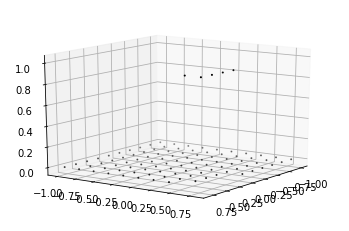

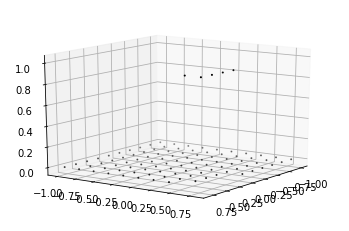

In [90]:
xx = np.linspace(-1, 1, 11)
yy  = np.linspace(-1, 1, 11)
xx,yy = np.meshgrid(xx, yy)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:10, :10], yy[:10, :10], y[28].reshape((10, 10)),color = 'black', s = 1)
ax.view_init(15, 35)


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:10, :10], yy[:10, :10], pred[28].reshape((10, 10)),color = 'black', s = 1)
ax.view_init(15, 35)

In [91]:
model.save('FineModel')

In [92]:
!cp FineModel -r drive/MyDrive

In [93]:
fmodel = keras.models.load_model('FineModel')
tpred = fmodel.predict(x)
tpred = (tpred > 0.5).astype('float32')
np.linalg.norm(tpred - pred)

32/32 [==============================] - 0s 5ms/step


0.0

In [114]:
def coupledModel(x):
  ans = np.zeros((x.shape[0], 100, 100))
  for i in range(10):
    for j in range(10):
      temp_x = x[:, 10*i : 10 *(i + 1) + 1, 10 *j : 10 *(j + 1) + 1]
      temp_y = (fmodel.predict(temp_x)>0.5).astype('float32')
      ans[:, 10*i : 10 *(i + 1), 10 *j : 10 *(j + 1)] = temp_y.reshape(x.shape[0], 10, 10)
  return ans

In [118]:
def getFinalData(M):
  x = []
  y = []
  d =DataGenerator()
  for _  in tqdm(range(M)):
    if i%2 == 0:
      ans, labels, coarse_labels = d.DataPointLine()
    else:
      ans, labels, coarse_labels = d.DataPointCirc()
    m, n = ans.shape
    ans = ans.reshape((m, n, 1))
    x.append(ans)
    y.append(labels)
  return np.asarray(x), np.asarray(y)


In [119]:
x,y = getFinalData(10)

  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
pred = coupledModel(x)


In [121]:
y[0].shape

(100, 100)

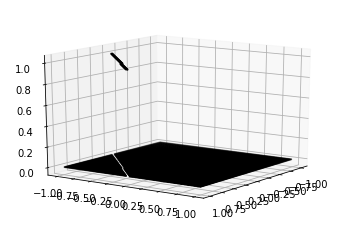

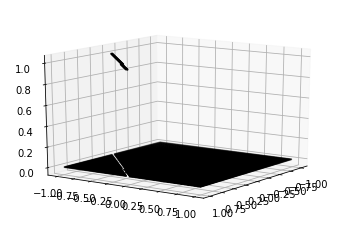

In [122]:
xx = np.linspace(-1, 1, 101)
yy  = np.linspace(-1, 1, 101)
xx,yy = np.meshgrid(xx, yy)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:100, :100], yy[:100, :100], y[0],color = 'black', s = 1)
ax.view_init(15, 35)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xx[:100, :100], yy[:100, :100], pred[0],color = 'black', s = 1)
ax.view_init(15, 35)